# 맛집 추천  시스템 

## 데이터 전처리 작업

In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [11]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [3]:
from haversine import haversine

lyon = (45.7597, 4.8422) # (lat, lon)
paris = (48.8567, 2.3508)

haversine(lyon, paris)

392.2172595594006

#### 데이터 불러오기

In [13]:
data = pd.read_csv('./data/네이버맵음식점평점_최종.csv',index_col=0)
LL = pd.read_csv('data/total1.csv',index_col=0) # 위경도 데이터

In [15]:
LL=LL.drop(['star_sum','sangtae'],axis=1)

In [17]:
LL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7311 entries, 0 to 7310
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      7311 non-null   int64  
 1   name       7311 non-null   object 
 2   upjong     7311 non-null   object 
 3   address_x  7311 non-null   object 
 4   category   7311 non-null   object 
 5   star_num   7311 non-null   int64  
 6   star_avg   7311 non-null   float64
 7   Latitude   7311 non-null   float64
 8   Longitude  7311 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 571.2+ KB


In [16]:
LL.to_csv('data/total1.csv')

#### ID 당 리뷰 갯수 파악

In [5]:
data['write_id'].value_counts()

5ea173de8f87a842bc3b60f8    225
5be00b9869e141a0de1eae3e    131
5deef5038f87a842bced4f0c    117
5c9c11438f865fe934386d66    114
5da97d648f87a842bca35ce9    111
                           ... 
5e26f7478f87a842bcf4175b      1
601529542898c7d89f8a1ed1      1
5c2b2699efa52f795657b9eb      1
5c059f1f326496082ed05e40      1
5cb8936f90fc3e0356d5c4f4      1
Name: write_id, Length: 213420, dtype: int64

#### 리뷰 갯수

In [6]:
data.value_counts('name')

name
고집돌우럭 중문점     5845
문개항아리조천본점     5188
설레임           5042
델문도           3183
제주순풍해장국함덕점    2961
              ... 
남촌               1
펠롱               1
비비큐치킨추자점         1
땅땅치킨삼도점          1
남이네육개장           1
Length: 7311, dtype: int64

#### 평균 별점

In [7]:
avg_star = data.pivot_table('rating',index='name',aggfunc='mean')

In [8]:
avg_star.head()

,rating
name,
(주)삼다도횟집,4.350000
09학번,5.000000
1.5커피,5.000000
11시11분,4.684211
168테우카페,4.650000


## 리뷰 갯수로 식당 평점
- 리뷰 갯수 20/30/40/50 개로 구별해서 변수 생성

### 리뷰 개수로 데이터 정리 함수
- 리뷰 개수를 입력하면 입력 값보다 작은 리뷰수가 있는 식당을 삭제
- data : 별점 데이터
- num : 리뷰 개수 기준

In [5]:
def data_arr(data, num): 
    
    ## 리뷰 개수 num개 이상 작성한 id만 추출
    temp_data = data[data.count(axis=1)>=num]
    

    ## 리뷰가 없는 식당 삭제
    temp_data_T = temp_data.T[temp_data.T.sum(axis=1)>0]
    temp_data = temp_data_T.T

    ## NaN값을 -1로 변경 ( 평점을 계산할 때 양수값만 처리하면 됌)
    temp_data.fillna(-1,inplace=True)

    ## 아이디값 숫자로 변환
    result = temp_data.reset_index(drop=True)

    ## csv로 저장
    result.to_csv('./data/star_data_' + str(num) + '.csv')
    
    return result

### 리뷰 개수 10/20/30/40/50개

In [6]:
# 사용할 별점 데이터
star_data = data.pivot_table(index='write_id',columns='name',values='rating')

In [ ]:
#star_data.to_csv('./data/star_data.csv')

In [11]:
star_data.head(3)

name,(주)삼다도횟집,09학번,1.5커피,11시11분,168테우카페,17번가,1950김프로,1974한식뷔페,19티성산일출봉점,1석2조,...,흥부네장어갈비,흥부네정식,흥수아구찜,희랑김밥,희야국수,희야네식당,히비,히아담,힐링푸드,힘찬장어
write_id,,,,,,,,,,,,,,,,,,,,,
5b61c7658f8242cb2a1b1028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5b62c91cd898db2e71efcc59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5b62e6c46daf19a0c8d33997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 리뷰 개수에 따른 변수 선언

star_data_10 = data_arr(star_data, 10)
star_data_20 = data_arr(star_data, 20)
star_data_30 = data_arr(star_data, 30)
star_data_40 = data_arr(star_data, 40)
star_data_50 = data_arr(star_data, 50)

**저장한 csv 있을 경우 아래 코드 사용 (시간 절약 의도)**
- csv에서 불러오면 인덱스 name 문제가 생겨 에러 발생
- 해결 필요

In [136]:
## 변수에 저장
#star_data = pd.read_csv('./data/star_data.csv',index_col=0)
#star_data_10 = pd.read_csv('./data/star_data_10.csv',index_col=0)
# star_data_20 = pd.read_csv('./data/star_data_20.csv',index_col=0)
# star_data_30 = pd.read_csv('./data/star_data_30.csv',index_col=0)
# star_data_40 = pd.read_csv('./data/star_data_40.csv',index_col=0)
# star_data_50 = pd.read_csv('./data/star_data_50.csv',index_col=0)

In [7]:
#(리뷰개수를 기준, 전체 식당)
star_data.shape 
star_data_10.shape 
star_data_20.shape 
star_data_30.shape 
star_data_40.shape
star_data_50.shape

(213420, 7311)

(3504, 6401)

(898, 5502)

(382, 4836)

(201, 4182)

(124, 3561)

### 추천 시스템 정리

**(1) 가중 평점**
- 가중 평점을 기준으로 순위 추천

**(2) 코사인 유도**
- 콘텐츠 기반 추천

**(3) KDD**

**(4) 피어슨 상관계수**

#  1. 가중 평점기반 추천
### 맛집 추천 시스템 함수화

#### 전처리 및 가중치 함수화

In [18]:
def make_review_data(data, area, percentile=0.6):

    cnt_review = pd.DataFrame(data.value_counts('name'))
    avg_star = data.pivot_table('rating',index='name',aggfunc='mean')

    # 평점/리뷰갯수 정보를 가지는 temp 변수 생성
    temp = avg_star.merge(cnt_review,left_index=True,right_index=True,how='left')
    temp.columns = ['rating','num']
    
    temp= temp.fillna(0)
    
    temp

    
    m = temp['num'].quantile(percentile)
    C = temp['rating'].mean()

    
    #가충치 함수를 람다함수로 처리
    temp['weighted_rating'] = temp.apply((lambda x: (x['num']/(x['num']+m)*x['rating'])+(m/(m+x['num'])*C)), axis=1)
    
    
    ## 주소 부분
    # 음식점 이름 + 주소를 기준으로 그룹화 시켜서 
    address =pd.DataFrame(data.groupby(['name'])['address'].first())
    
    # 주소 부분 병합
    temp=temp.merge(address,left_index=True,right_index=True)
    
    
    ## 지역부분
    # 음식점 이름 + 지역을 기준으로 그룹화 시켜서 
    name_area =pd.DataFrame(data.groupby(['name'])['category'].first())
    
    # 평점/리뷰갯수에 음식점 이름 + 지역 병합
    temp=temp.merge(name_area,left_index=True,right_index=True)
    
    
    # 사용자 위치에 해당되는 정보만 정리
    temp=temp[temp['category']==area]
    
    temp
    # 정렬후 반환
    return temp[['rating','weighted_rating','num','category','address']].sort_values('weighted_rating', ascending=False)[:10]

## 실제 구현 부분

In [36]:
# 해당 지점을 DB랑 연결
data = pd.read_csv('./data/네이버맵음식점평점_최종.csv')

if __name__=='__main__':
    print('사용자 위치를 입력해주세요')
    print()
    input_data_area=input()
    # 식당 순위 info에 저장
    info = make_review_data(data, input_data_area)
    
    info.reset_index(inplace=True)
    
    print()
    print()
    # 식당 순위 출력
    for i in range(5):
        print(i+1,'순위')
        print('음식점 이름 : ', info['name'][i], '\t평균 평점 : ', round(info['weighted_rating'][i],2))
        print('--------------------------------------------------------------------------------------')
        print()

사용자 위치를 입력해주세요

애월읍


1 순위
음식점 이름 :  쉬다가게 	평균 평점 :  4.92
--------------------------------------------------------------------------------------

2 순위
음식점 이름 :  호커센터 	평균 평점 :  4.91
--------------------------------------------------------------------------------------

3 순위
음식점 이름 :  제주기와 	평균 평점 :  4.9
--------------------------------------------------------------------------------------

4 순위
음식점 이름 :  포구횟집 	평균 평점 :  4.88
--------------------------------------------------------------------------------------

5 순위
음식점 이름 :  누렁소앤도새기 	평균 평점 :  4.88
--------------------------------------------------------------------------------------



In [20]:
info

,name,rating,weighted_rating,num,category,address
0,쉬다가게,4.960648,4.923976,216,애월읍,"제주특별자치도 제주시 애월읍 구엄길 66, 1층"
1,호커센터,4.920394,4.906717,559,애월읍,제주특별자치도 제주시 애월읍 애월로11길 25-2
2,제주기와,4.913000,4.897989,500,애월읍,"제주특별자치도 제주시 애월읍 광령남4길 45-1, 1층"
3,포구횟집,4.898798,4.884199,499,애월읍,제주특별자치도 제주시 애월읍 가문동길 43
4,누렁소앤도새기,4.948980,4.875987,98,애월읍,"제주특별자치도 제주시 애월읍 광령남6길 14, 1층"
5,카페앤틱애월,4.975806,4.863622,62,애월읍,"제주특별자치도 제주시 애월읍 하귀11길 39, 1층"
6,낮갈치밤돼지,4.914773,4.840024,88,애월읍,"제주특별자치도 제주시 애월읍 신엄7길 9, 1층"
7,와썹,4.933824,4.837649,68,애월읍,"제주특별자치도 제주시 애월읍 곽지1길 30, 1층 제1호"
8,금돈가,4.857488,4.826738,207,애월읍,"제주특별자치도 제주시 애월읍 가문동남길 63, 1층"
9,애월포구횟집,4.875000,4.815521,104,애월읍,"제주특별자치도 제주시 애월읍 애월로11길 22, 2층"


In [21]:
 make_review_data(data, input_data_area)

,rating,weighted_rating,num,category,address
name,,,,,
쉬다가게,4.960648,4.923976,216,애월읍,"제주특별자치도 제주시 애월읍 구엄길 66, 1층"
호커센터,4.920394,4.906717,559,애월읍,제주특별자치도 제주시 애월읍 애월로11길 25-2
제주기와,4.913000,4.897989,500,애월읍,"제주특별자치도 제주시 애월읍 광령남4길 45-1, 1층"
포구횟집,4.898798,4.884199,499,애월읍,제주특별자치도 제주시 애월읍 가문동길 43
누렁소앤도새기,4.948980,4.875987,98,애월읍,"제주특별자치도 제주시 애월읍 광령남6길 14, 1층"
카페앤틱애월,4.975806,4.863622,62,애월읍,"제주특별자치도 제주시 애월읍 하귀11길 39, 1층"
낮갈치밤돼지,4.914773,4.840024,88,애월읍,"제주특별자치도 제주시 애월읍 신엄7길 9, 1층"
와썹,4.933824,4.837649,68,애월읍,"제주특별자치도 제주시 애월읍 곽지1길 30, 1층 제1호"
금돈가,4.857488,4.826738,207,애월읍,"제주특별자치도 제주시 애월읍 가문동남길 63, 1층"


# 코사이 유사도 추천
### 맛집 추천 시스템 (컨텐츠 기반)

In [22]:
def make_relation(data):
    
    # 사용자 별 식당 별점 피봇테이블 -  개오래걸림
    piv = data.pivot_table(values='rating',index='write_id',columns='name')
    
    # NaN 값을 모두 0 으로 변환 - 오래걸림
    piv = piv.fillna(0)
    
    # 사용자-아이템 행렬 데이터를 아이템-사용자 행렬 데이터로 변환
    piv_T = piv.transpose()
    
    # 아이템간의 코사인 유사도로 아이템 유사도 산출 - 좀 걸림
    from sklearn.metrics.pairwise import cosine_similarity
    piv_sim = cosine_similarity(piv_T,piv_T)

    # cosine_similarity() 로 반환된 넘파이 행렬을 영화명을 매핑하여 DataFrame으로 변환
    piv_sim_df = pd.DataFrame(data=piv_sim, index=piv.columns,
                              columns=piv.columns)
    
    return piv_sim_df

In [23]:
piv_sim_df=make_relation(data)

**유사도 계산 후 csv 저장 (저장한거 사용)**

In [24]:
# 매번 돌리면 오래걸리기 때문에 저장 후 사용

piv_sim_df.to_csv('./data/relation_food.csv')

In [25]:
data2 = pd.read_csv('./data/relation_food.csv',index_col=['name'])

In [27]:
data2.head(2)

,(주)삼다도횟집,09학번,1.5커피,11시11분,168테우카페,17번가,1950김프로,1974한식뷔페,19티성산일출봉점,1석2조,...,흥부네장어갈비,흥부네정식,흥수아구찜,희랑김밥,희야국수,희야네식당,히비,히아담,힐링푸드,힘찬장어
name,,,,,,,,,,,,,,,,,,,,,
(주)삼다도횟집,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09학번,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 실제 구현 부분

In [30]:
# name과 유사도가 높은 상위 10개 식당 추출

data2 = pd.read_csv('data/relation_food.csv',index_col=['name'])

In [31]:
data2.head()

,(주)삼다도횟집,09학번,1.5커피,11시11분,168테우카페,17번가,1950김프로,1974한식뷔페,19티성산일출봉점,1석2조,...,흥부네장어갈비,흥부네정식,흥수아구찜,희랑김밥,희야국수,희야네식당,히비,히아담,힐링푸드,힘찬장어
name,,,,,,,,,,,,,,,,,,,,,
(주)삼다도횟집,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
09학번,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1.5커피,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
11시11분,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.029676,0.0,0.0,0.0
168테우카페,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [35]:
# 해당 지점을 DB랑 연결

if __name__=='__main__':
    print('만족한 식당을 입력해 주세요')
    print()
    input_data_rest=input()
    # 관련 식당 info에 저장
    info = data2[input_data_rest].sort_values(ascending=False)[1:11]
    info = pd.DataFrame(info).merge(pd.DataFrame(data.groupby(['name'])['address'].first()),left_index=True,right_on='name',how='inner')
    print()
    print()
    
    # 관련 식당 순위 출력
    for i in range(5):
        print(i+1,'순위')
        print('음식점 이름 : ', info.index[i], '\t연관성 : ', round(info[input_data_rest][i],2))
        print('--------------------------------------------------------------------------------------')
        print()

만족한 식당을 입력해 주세요

우돈향


1 순위
음식점 이름 :  성산흑돈쭐 	연관성 :  0.44
--------------------------------------------------------------------------------------

2 순위
음식점 이름 :  기쁨이네해물탕앤돌솥밥 	연관성 :  0.42
--------------------------------------------------------------------------------------

3 순위
음식점 이름 :  연탄과친한돼지 	연관성 :  0.39
--------------------------------------------------------------------------------------

4 순위
음식점 이름 :  만세본점 	연관성 :  0.37
--------------------------------------------------------------------------------------

5 순위
음식점 이름 :  해미원횟집 	연관성 :  0.37
--------------------------------------------------------------------------------------



In [37]:
# name과 유사도가 높은 상위 6개 식당 추출
data2['성산흑돈쭐'].sort_values(ascending=False)[1:7]

name
우돈향            0.437549
기쁨이네해물탕앤돌솥밥    0.379450
애월포구횟집         0.331223
해미원횟집          0.325875
연탄과친한돼지        0.325105
만세본점           0.307287
Name: 성산흑돈쭐, dtype: float64

In [43]:
aa=data2['성산흑돈쭐'].sort_values(ascending=False)[1:7]
aa

name
우돈향            0.437549
기쁨이네해물탕앤돌솥밥    0.379450
애월포구횟집         0.331223
해미원횟집          0.325875
연탄과친한돼지        0.325105
만세본점           0.307287
Name: 성산흑돈쭐, dtype: float64

# KDD 기반 추천 시스템

## KDD란?
- KDD = Knowledge Discover in Database
- 아이템 기반 협업 필터링
- 데이터에 유의미한 규칙을 찾아내는 알고리즘
- AR(= Association Rule) 순위/인기도를 기반으로 추천

### 사용함수

In [8]:
#kdd 유사도 함수 
from math import sqrt
def sim_distance(data, n1, n2):
    sum=0
    #두 사용자가 모두 간 식당를 기준으로 해야해서 i로 변수 통일(j따로 안 써줌)
    for i in data[data[n1]>=0].index:
         if data.loc[i,n2]>=0:
            sum+=pow(data.loc[i,n1]-data.loc[i,n2],2) #누적합 
    if sum==0:
        return 0
    return sqrt(1/(sum+1)) #유사도 형식으로 출력 

In [9]:
# 나와 유사도가 높은 user 매칭 함수
def top_match(data, name, rank = 5, simf = sim_distance):
    simList = []
    for i in list(data.columns):
        if name != i:
            if simf(data,name,i)!=0:
                simList.append((simf(data, name, i), i))
    simList.sort()
    simList.reverse()    
    return simList[:rank]

In [10]:
# 추천 시스템 함수
def recommendation(data, person, simf = sim_distance):
    res = top_match(data, person) # person과 유사도가 높은 user
    score_dic = {}
    sim_dic = {}
    myList = []
    for sim, name in res:
        for movie in data.loc[:, data.loc[:, person] < 0].index:
            if sim>0:
                simSum = 0
                if data.loc[movie, name] >= 0:
                    simSum += sim * data.loc[movie, name]

                    score_dic.setdefault(movie, 0) # 평점 0으로 설정 후
                    score_dic[movie] += simSum # 

                    sim_dic.setdefault(movie, 0)
                    sim_dic[movie] += sim                
    for key in score_dic:
        myList.append((score_dic[key] / sim_dic[key], key))
    myList.sort()
    myList.reverse()
    
    return myList

In [11]:
## 의문점 나를 지칭하는 것이 recommendation 함수로 (인덱스)형태로 들어감
## 근데 데이터를 전처리하는 과정에서 내 아이가 삭제 될경우
def result_function(data):
    data_T = data.T
    rest_name = pd.DataFrame(data_T.index)
    rest_name.columns=['name']
    data_T.reset_index(drop=True,inplace=True)
    
    res_List = []
    for rate, m_id in recommendation(data_T, 2):
        res_List.append((round(rate,2), rest_name.loc[m_id, 'name']))
        if len(res_List)==10: #10 개되면 멈추기 
            break
    result = res_List[:10] # 10개만 추출 
    return result

In [12]:
# 확인 목록
#(리뷰개수를 기준, 전체 식당)
star_data.shape 
star_data_10.shape 
star_data_20.shape 
star_data_30.shape 
star_data_40.shape
star_data_50.shape

(213420, 7311)

(3504, 6401)

(898, 5502)

(382, 4836)

(201, 4182)

(124, 3561)

## star_data_10

In [12]:
star_data_10_T = star_data_10.T

In [13]:
rest_name = pd.DataFrame(star_data_10_T.index)
rest_name.columns=['name']
rest_name

,name
0,(주)삼다도횟집
1,09학번
2,1.5커피
3,11시11분
4,17번가
...,...
6396,희야네식당
6397,히비
6398,히아담
6399,힐링푸드


In [14]:
star_data_10_T=star_data_10.T
star_data_10_T.reset_index(drop=True,inplace=True)

In [15]:
rest_name.iloc[3334]

name    씨유제주영평점
Name: 3334, dtype: object

In [16]:
# user가 안간 식당중에서 
#추천 점수가 가장 높은 순으로 예상평점과 식당이름을 추천 (10개까지)
movieList = []
for rate, m_id in recommendation(star_data_10_T, 3334):
    movieList.append((round(rate,2), rest_name.loc[m_id, 'name']))
movieList[:10]

[(5.0, '홍대개미'),
 (5.0, '헛간'),
 (5.0, '해상'),
 (5.0, '한끼맛있다제주시청점'),
 (5.0, '피치랑삼화점'),
 (5.0, '투썸플레이스엠제이벤처오름점'),
 (5.0, '투다리파워점'),
 (5.0, '태선갈비일도점'),
 (5.0, '탐라가든'),
 (5.0, '키친요디')]

## star_data_20

In [18]:
star_data_20_T = star_data_20.T

In [19]:
rest_name = pd.DataFrame(star_data_20_T.index)
rest_name.columns=['name']
rest_name

,name
0,09학번
1,1.5커피
2,11시11분
3,17번가
4,1950김프로
...,...
5497,희랑김밥
5498,희야네식당
5499,히비
5500,힐링푸드


In [20]:
star_data_20_T=star_data_20.T
star_data_20_T.reset_index(drop=True,inplace=True)

In [21]:
rest_name.iloc[3334]

name    오병이어
Name: 3334, dtype: object

In [23]:
# user가 안간 식당중에서 
#추천 점수가 가장 높은 순으로 예상평점과 식당이름을 추천 (10개까지)
movieList = []
for rate, m_id in recommendation(star_data_20_T, 502):
    movieList.append((round(rate,2), rest_name.loc[m_id, 'name']))
movieList[:10]

[(5.0, '황제궁'),
 (5.0, '홍성방'),
 (5.0, '해모루'),
 (5.0, '한라닭강정'),
 (5.0, '하우다'),
 (5.0, '하귀청마루'),
 (5.0, '피그농원'),
 (5.0, '평산'),
 (5.0, '페리카나치킨조천점'),
 (5.0, '파스쿠찌서귀포일호광장점')]

# 피어슨상관계수 추천 기반 
### 맛집 추천 (단점 계산느림)

In [17]:
#피어슨 상관계수
from math import sqrt
def sim_pearson(data, n1, n2): 
    #구현
    sumX=0
    sumY=0
    sumSqX=0 # x 제곱합 
    sumSqY=0 # y 제곱합 
    sumXY=0 #XY 합
    cnt =0 #식당 갯수 
    nums=0
    den=0
    for i in data[data[n1]>=0].index:
        if  data.loc[i,n2]>=0:
            sumX+=data.loc[i,n1]
            sumY+=data.loc[i,n2]
            sumSqX+=pow(data.loc[i,n1],2)
            sumSqY+=pow(data.loc[i,n2],2)
            sumXY+=(data.loc[i,n1])*(data.loc[i,n2])
            cnt+=1
#             global nums # 전역변수 선언
#             global den # 전역변수 선언
            nums=sumXY-((sumX*sumY)/cnt)
            den= (sumSqX-(pow(sumX,2)/cnt))*(sumSqY-(pow(sumY,2)/cnt))
    return nums/sqrt(den+0.00001) # 분모=0방지

In [18]:
#나와 유사도가 높은 user와 매칭 함수
def top_match(data, name, rank = 5, simf = sim_pearson):
    simList = []
    for i in data.columns:
        if name != i:
            if simf(data, name, i) is not None:
                simList.append((simf(data, name, i), i))
    simList.sort()
    simList.reverse()
    return simList[:rank]

In [19]:
#추천 시스템 함수
def recommendation(data, person, simf = sim_pearson):
    res = top_match(data, person)
    score_dic = {}
    sim_dic = {}
    myList = []
    for sim, name in res:
        for movie in data.loc[:, data.loc[:, person] < 0].index:
            if sim>0:
                simSum = 0
                if data.loc[movie, name] >= 0:
                    simSum += sim * data.loc[movie, name]

                    score_dic.setdefault(movie, 0)
                    score_dic[movie] += simSum

                    sim_dic.setdefault(movie, 0)
                    sim_dic[movie] += sim                
    for key in score_dic:
        myList.append((score_dic[key] / sim_dic[key], key))
    myList.sort()
    myList.reverse()
    
    return myList

## 결과 도출 함수

In [34]:
## 의문점 나를 지칭하는 것이 recommendation 함수로 (인덱스)형태로 들어감
## 근데 데이터를 전처리하는 과정에서 내 아이가 삭제 될경우
def result_function(data):
    data_T = data.T
    rest_name = pd.DataFrame(data_T.index)
    rest_name.columns=['name']
    data_T.reset_index(drop=True,inplace=True)
    
    res_List = []
    for rate, m_id in recommendation(data_T, 2):
        res_List.append((round(rate,2), rest_name.loc[m_id, 'name']))
        if len(res_List)==10: #10 개되면 멈추기 
            break
    result = res_List[:10] # 10개만 추출 
    return result

#### 전처리

In [5]:
# 사용할 별점 데이터
star_data = data.pivot_table(index='write_id',columns='name',values='rating')

In [8]:
# 리뷰 개수에 따른 변수 선언

star_data_10 = data_arr(star_data, 10)
star_data_20 = data_arr(star_data, 20)
star_data_30 = data_arr(star_data, 30)
star_data_40 = data_arr(star_data, 40)
star_data_50 = data_arr(star_data, 50)

In [29]:
#(리뷰개수를 기준, 전체 식당)
star_data.shape 
star_data_10.shape 
star_data_20.shape 
star_data_30.shape 
star_data_40.shape
star_data_50.shape

(213420, 7311)

(3504, 6401)

(898, 5502)

(382, 4836)

(201, 4182)

(124, 3561)

### 리뷰 10개 이상

In [22]:
temp = result_function(star_data_10)

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

1 번째
식당이름 :  새터우동이랑충무김밥  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  백년갈비터미널점  평점 :  5.0 점
--------------------------------------------------------
3 번째
식당이름 :  미스등갈비제주점  평점 :  5.0 점
--------------------------------------------------------
4 번째
식당이름 :  내고향해장국  평점 :  5.0 점
--------------------------------------------------------
5 번째
식당이름 :  각지불  평점 :  5.0 점
--------------------------------------------------------
6 번째
식당이름 :  가마치통닭용담점  평점 :  5.0 점
--------------------------------------------------------
7 번째
식당이름 :  아라스시  평점 :  5.0 점
--------------------------------------------------------
8 번째
식당이름 :  씨유서귀포광장점  평점 :  5.0 점
--------------------------------------------------------
9 번째
식당이름 :  시장골목순대  평점 :  5.0 점
--------------------------------------------------------
10 번째
식당이름 :  소금막식당  평점 :  5.0 점
--------------------------------------------------------


### 리뷰 20개 이상

In [36]:
temp = result_function(star_data_20)

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

1 번째
식당이름 :  흑돈플러스  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  포동정식시청점  평점 :  5.0 점
--------------------------------------------------------
3 번째
식당이름 :  토계정  평점 :  5.0 점
--------------------------------------------------------
4 번째
식당이름 :  제주초밥  평점 :  5.0 점
--------------------------------------------------------
5 번째
식당이름 :  제주명가두루치기  평점 :  5.0 점
--------------------------------------------------------
6 번째
식당이름 :  저지리498맛나게드시게  평점 :  5.0 점
--------------------------------------------------------
7 번째
식당이름 :  우도아름다운소풍  평점 :  5.0 점
--------------------------------------------------------
8 번째
식당이름 :  애월빵공장앤카페  평점 :  5.0 점
--------------------------------------------------------
9 번째
식당이름 :  빽다방베이커리제주사수본점  평점 :  5.0 점
--------------------------------------------------------
10 번째
식당이름 :  블랙데이  평점 :  5.0 점
--------------------------------------------------------


### 리뷰 30개 이상

In [24]:
temp = result_function(star_data_30)

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

1 번째
식당이름 :  구엄애초밥  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  고도500  평점 :  5.0 점
--------------------------------------------------------
3 번째
식당이름 :  고깃소리  평점 :  5.0 점
--------------------------------------------------------
4 번째
식당이름 :  가온누리정식  평점 :  5.0 점
--------------------------------------------------------
5 번째
식당이름 :  7번가피자제주삼화점  평점 :  5.0 점
--------------------------------------------------------
6 번째
식당이름 :  7번가피자서귀점  평점 :  5.0 점
--------------------------------------------------------
7 번째
식당이름 :  금능제면소  평점 :  5.0 점
--------------------------------------------------------
8 번째
식당이름 :  금능낙원  평점 :  5.0 점
--------------------------------------------------------
9 번째
식당이름 :  금강민물장어  평점 :  5.0 점
--------------------------------------------------------
10 번째
식당이름 :  그루  평점 :  5.0 점
--------------------------------------------------------


### 리뷰 40개 이상

In [25]:
temp = result_function(star_data_40)

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

1 번째
식당이름 :  공기  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  고할망네  평점 :  5.0 점
--------------------------------------------------------
3 번째
식당이름 :  고보배국밥  평점 :  5.0 점
--------------------------------------------------------
4 번째
식당이름 :  고등어쌈밥  평점 :  5.0 점
--------------------------------------------------------
5 번째
식당이름 :  경일낙지  평점 :  5.0 점
--------------------------------------------------------
6 번째
식당이름 :  감성커피화북점  평점 :  5.0 점
--------------------------------------------------------
7 번째
식당이름 :  갈래길국수  평점 :  5.0 점
--------------------------------------------------------
8 번째
식당이름 :  가파도해물짜장짬뽕  평점 :  5.0 점
--------------------------------------------------------
9 번째
식당이름 :  가담국수  평점 :  5.0 점
--------------------------------------------------------
10 번째
식당이름 :  GS25제주아쿠아플라넷  평점 :  5.0 점
--------------------------------------------------------


### 리뷰 50개 이상

In [26]:
temp = result_function(star_data_50)

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

1 번째
식당이름 :  겨우서른  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  거멍국수  평점 :  5.0 점
--------------------------------------------------------
3 번째
식당이름 :  거로집  평점 :  5.0 점
--------------------------------------------------------
4 번째
식당이름 :  강명선샤브샤브  평점 :  5.0 점
--------------------------------------------------------
5 번째
식당이름 :  감성커피봉개점  평점 :  5.0 점
--------------------------------------------------------
6 번째
식당이름 :  가파도별미식당  평점 :  5.0 점
--------------------------------------------------------
7 번째
식당이름 :  가영이네횟집  평점 :  5.0 점
--------------------------------------------------------
8 번째
식당이름 :  EQ치킨  평점 :  5.0 점
--------------------------------------------------------
9 번째
식당이름 :  7번가피자서귀점  평점 :  5.0 점
--------------------------------------------------------
10 번째
식당이름 :  5길  평점 :  5.0 점
--------------------------------------------------------


## 결론
- 리뷰 개수가 몇개 이든 Top 10 결과는 동일하지 않음
- 문제는 자기 자신을 가리키는 인덱스를 처리해야 할것으로 파악

# 자기 인덱스 찾아서 문제 해결

In [20]:
data['write_id'].value_counts()
# 5da97d648f87a842bca35ce9  해당 아이디로 진행

5ea173de8f87a842bc3b60f8    225
5be00b9869e141a0de1eae3e    131
5deef5038f87a842bced4f0c    117
5c9c11438f865fe934386d66    114
5da97d648f87a842bca35ce9    111
                           ... 
5b978199b90370e096b5ab40      1
5fa9ed5aa3e5d75b75e4cfd9      1
5d20a526c491df0a58ba4e17      1
5f9682a212ddca883d566db9      1
5be64ed4ca70108ccd9eb45d      1
Name: write_id, Length: 213420, dtype: int64

## 기본 데이터를 만들고 맨 마지막에 유저 데이터를 추가해서 찾아주기

In [ ]:
# 사용할 별점 데이터
star_data = data.pivot_table(index='write_id',columns='name',values='rating')

In [21]:
star_data.shape
star_data.head(2)

(213420, 7311)

name,(주)삼다도횟집,09학번,1.5커피,11시11분,168테우카페,17번가,1950김프로,1974한식뷔페,19티성산일출봉점,1석2조,...,흥부네장어갈비,흥부네정식,흥수아구찜,희랑김밥,희야국수,희야네식당,히비,히아담,힐링푸드,힘찬장어
write_id,,,,,,,,,,,,,,,,,,,,,
5b61c7658f8242cb2a1b1028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5b62c91cd898db2e71efcc59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
import numpy as np
val = np.random.randint(0, 6, size=(1, 7311))
list_val=list(val)

In [23]:
val_df = pd.DataFrame(list_val, columns=star_data.columns,index=['me'])

val_df 

name,(주)삼다도횟집,09학번,1.5커피,11시11분,168테우카페,17번가,1950김프로,1974한식뷔페,19티성산일출봉점,1석2조,...,흥부네장어갈비,흥부네정식,흥수아구찜,희랑김밥,희야국수,희야네식당,히비,히아담,힐링푸드,힘찬장어
me,3,4,1,2,3,3,4,5,3,4,...,1,4,2,0,3,5,0,5,4,1


In [24]:
user_data = pd.concat([star_data,val_df])

In [25]:
user_data.tail()

name,(주)삼다도횟집,09학번,1.5커피,11시11분,168테우카페,17번가,1950김프로,1974한식뷔페,19티성산일출봉점,1석2조,...,흥부네장어갈비,흥부네정식,흥수아구찜,희랑김밥,희야국수,희야네식당,히비,히아담,힐링푸드,힘찬장어
61691b18552a695b802cf8ed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616964e25ced4098c30b5f4d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616a6babf4ff9c12c7d011c2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616a733ecf7fda6d69a812bd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
me,3.0,4.0,1.0,2.0,3.0,3.0,4.0,5.0,3.0,4.0,...,1.0,4.0,2.0,0.0,3.0,5.0,0.0,5.0,4.0,1.0


In [67]:
def data_arr(data, num): 
    
    ## 리뷰 개수 num개 이상 작성한 id만 추출
    temp_data = data[data.count(axis=1)>=num]
    

    ## 리뷰가 없는 식당 삭제
    temp_data_T = temp_data.T[temp_data.T.sum(axis=1)>0]
    temp_data = temp_data_T.T

    ## NaN값을 -1로 변경 ( 평점을 계산할 때 양수값만 처리하면 됌)
    temp_data.fillna(-1,inplace=True)

    ## 아이디값 숫자로 변환
    result = temp_data.reset_index(drop=True)

    ## csv로 저장
    result.to_csv('./data/star_data_' + str(num) + '.csv')
    
    return result

## 피어슨 (인덱스 문제 수정)

In [27]:
#피어슨 상관계수
from math import sqrt
def sim_pearson(data, n1, n2): 
    #구현
    sumX=0
    sumY=0
    sumSqX=0 # x 제곱합 
    sumSqY=0 # y 제곱합 
    sumXY=0 #XY 합
    cnt =0 #식당 갯수 
    nums=0
    den=0
    for i in data[data[n1]>=0].index:
        if  data.loc[i,n2]>=0:
            sumX+=data.loc[i,n1]
            sumY+=data.loc[i,n2]
            sumSqX+=pow(data.loc[i,n1],2)
            sumSqY+=pow(data.loc[i,n2],2)
            sumXY+=(data.loc[i,n1])*(data.loc[i,n2])
            cnt+=1
#             global nums # 전역변수 선언
#             global den # 전역변수 선언
            nums=sumXY-((sumX*sumY)/cnt)
            den= (sumSqX-(pow(sumX,2)/cnt))*(sumSqY-(pow(sumY,2)/cnt))
    return nums/sqrt(den+0.00001) # 분모=0방지

In [28]:
#나와 유사도가 높은 user와 매칭 함수
def top_match(data, name, rank = 5, simf = sim_pearson):
    simList = []
    for i in data.columns:
        if name != i:
            if simf(data, name, i) is not None:
                simList.append((simf(data, name, i), i))
    simList.sort()
    simList.reverse()
    return simList[:rank]

In [29]:
#추천 시스템 함수
def recommendation(data, person, simf = sim_pearson):
    res = top_match(data, person)
    score_dic = {}
    sim_dic = {}
    myList = []
    for sim, name in res:
        for movie in data.loc[:, data.loc[:, person] < 0].index:
            if sim>0:
                simSum = 0
                if data.loc[movie, name] >= 0:
                    simSum += sim * data.loc[movie, name]

                    score_dic.setdefault(movie, 0)
                    score_dic[movie] += simSum

                    sim_dic.setdefault(movie, 0)
                    sim_dic[movie] += sim                
    for key in score_dic:
        myList.append((score_dic[key] / sim_dic[key], key))
    myList.sort()
    myList.reverse()
    
    return myList

In [44]:
## 의문점 나를 지칭하는 것이 recommendation 함수로 (인덱스)형태로 들어감
## 근데 데이터를 전처리하는 과정에서 내 아이가 삭제 될경우
def user_result_function(data):
    data_T = data.T
    rest_name = pd.DataFrame(data_T.index)
    rest_name.columns=['name']
    data_T.reset_index(drop=True,inplace=True)
    
    res_List = []
    for rate, m_id in recommendation(data_T, len(data)-1): ## len(data_T) 맨 마지막 인덱스라서
        res_List.append((round(rate,2), rest_name.loc[m_id, 'name']))
        if len(res_List)==10: #10 개되면 멈추기 
            break
    result = res_List[:10] # 10개만 추출 
    return result

In [26]:
user_data_10 = data_arr(user_data, 10)
user_data_20 = data_arr(user_data, 20)
user_data_30 = data_arr(user_data, 30)
user_data_40 = data_arr(user_data, 40)
user_data_50 = data_arr(user_data, 50)

In [31]:
#(아이디 수, 전체 식당 수)
user_data.shape 
user_data_10.shape 
user_data_20.shape 
user_data_30.shape 
user_data_40.shape
user_data_50.shape

(213421, 7311)

(3505, 7157)

(899, 7004)

(383, 6894)

(202, 6776)

(125, 6683)

### 리뷰갯수 10개 미만 제거

In [88]:
temp = user_result_function(user_data_10)
print('고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.')

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.
1 번째
식당이름 :  세븐일레븐서귀포강정점  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  섬노예  평점 :  5.0 점
--------------------------------------------------------
3 번째
식당이름 :  발라르  평점 :  5.0 점
--------------------------------------------------------
4 번째
식당이름 :  등촌샤브칼국수  평점 :  5.0 점
--------------------------------------------------------
5 번째
식당이름 :  대학로황가네  평점 :  5.0 점
--------------------------------------------------------
6 번째
식당이름 :  다시올레국수  평점 :  5.0 점
--------------------------------------------------------
7 번째
식당이름 :  시민골  평점 :  5.0 점
--------------------------------------------------------
8 번째
식당이름 :  시로코  평점 :  5.0 점
--------------------------------------------------------
9 번째
식당이름 :  스터디카페꿈  평점 :  5.0 점
--------------------------------------------------------
10 번째
식당이름 :  스을  평점 :  5.0 점
--------------------------------------------------------


#### 리뷰 20개

In [32]:
temp = user_result_function(user_data_20)
print('고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.')

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.
1 번째
식당이름 :  홍대개미  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  풍림다방송당점  평점 :  5.0 점
--------------------------------------------------------
3 번째
식당이름 :  카페지니  평점 :  5.0 점
--------------------------------------------------------
4 번째
식당이름 :  춘천명동닭갈비아라점  평점 :  5.0 점
--------------------------------------------------------
5 번째
식당이름 :  지에스25도련중앙점  평점 :  5.0 점
--------------------------------------------------------
6 번째
식당이름 :  조천밀밀면  평점 :  5.0 점
--------------------------------------------------------
7 번째
식당이름 :  영심이네집밥  평점 :  5.0 점
--------------------------------------------------------
8 번째
식당이름 :  언플러그  평점 :  5.0 점
--------------------------------------------------------
9 번째
식당이름 :  어머니맛집  평점 :  5.0 점
--------------------------------------------------------
10 번째
식당이름 :  쇠소깍모꼬지  평점 :  5.0 점
--------------------------------------------------------


#### 리뷰 30개

In [97]:
temp = user_result_function(user_data_30)
print('고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.')

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.
1 번째
식당이름 :  광평도새기촌본점  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  고찌올레  평점 :  5.0 점
--------------------------------------------------------
3 번째
식당이름 :  강식당  평점 :  5.0 점
--------------------------------------------------------
4 번째
식당이름 :  1석2조  평점 :  5.0 점
--------------------------------------------------------
5 번째
식당이름 :  괸당집도남점  평점 :  5.0 점
--------------------------------------------------------
6 번째
식당이름 :  괸당집노형점  평점 :  5.0 점
--------------------------------------------------------
7 번째
식당이름 :  괴기집  평점 :  5.0 점
--------------------------------------------------------
8 번째
식당이름 :  괜찮은술책  평점 :  5.0 점
--------------------------------------------------------
9 번째
식당이름 :  괜찮아  평점 :  5.0 점
--------------------------------------------------------
10 번째
식당이름 :  광치기흑돼지  평점 :  5.0 점
--------------------------------------------------------


#### 리뷰 40개

In [45]:
temp = user_result_function(user_data_40)
print('고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.')

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.
1 번째
식당이름 :  피자알볼로노형점  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  젤마씨  평점 :  4.5 점
--------------------------------------------------------
3 번째
식당이름 :  스타벅스커피신제주이마트점  평점 :  4.5 점
--------------------------------------------------------
4 번째
식당이름 :  삼다칼국수  평점 :  4.5 점
--------------------------------------------------------
5 번째
식당이름 :  떼르떼  평점 :  4.5 점
--------------------------------------------------------
6 번째
식당이름 :  단디다방  평점 :  4.5 점
--------------------------------------------------------
7 번째
식당이름 :  스타벅스제주노형공원점  평점 :  4.26 점
--------------------------------------------------------
8 번째
식당이름 :  수타명가  평점 :  4.25 점
--------------------------------------------------------
9 번째
식당이름 :  한라당몰국수  평점 :  4.0 점
--------------------------------------------------------
10 번째
식당이름 :  피오레  평점 :  4.0 점
--------------------------------------------------------


#### 리뷰 50개

In [99]:
temp = user_result_function(user_data_50)
print('고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.')

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.
1 번째
식당이름 :  GS25 제주국제점  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  가파도수산  평점 :  5.0 점
--------------------------------------------------------
3 번째
식당이름 :  가치  평점 :  5.0 점
--------------------------------------------------------
4 번째
식당이름 :  가자스크린골프  평점 :  5.0 점
--------------------------------------------------------
5 번째
식당이름 :  가인  평점 :  5.0 점
--------------------------------------------------------
6 번째
식당이름 :  가리비안의해적  평점 :  5.0 점
--------------------------------------------------------
7 번째
식당이름 :  가름물  평점 :  5.0 점
--------------------------------------------------------
8 번째
식당이름 :  가락동리어카포차외도점  평점 :  5.0 점
--------------------------------------------------------
9 번째
식당이름 :  가락국수  평점 :  5.0 점
--------------------------------------------------------
10 번째
식당이름 :  cu서귀호근로점  평점 :  5.0 점
--------------------------------------------------------


## KDD (인덱스 수정)

In [33]:
#kdd 유사도 함수 
from math import sqrt
def sim_distance(data, n1, n2):
    sum=0
    #두 사용자가 모두 간 식당를 기준으로 해야해서 i로 변수 통일(j따로 안 써줌)
    for i in data[data[n1]>=0].index:
         if data.loc[i,n2]>=0:
            sum+=pow(data.loc[i,n1]-data.loc[i,n2],2) #누적합 
    if sum==0:
        return 0
    return sqrt(1/(sum+1)) #유사도 형식으로 출력 

In [35]:
# 나와 유사도가 높은 user 매칭 함수
def top_match(data, name, rank = 5, simf = sim_distance):
    simList = []
    for i in list(data.columns):
        if name != i:
            if simf(data,name,i)!=0:
                simList.append((simf(data, name, i), i))
    simList.sort()
    simList.reverse()    
    return simList[:rank]

In [34]:
# 추천 시스템 함수
def recommendation(data, person, simf = sim_distance):
    res = top_match(data, person) # person과 유사도가 높은 user
    score_dic = {}
    sim_dic = {}
    myList = []
    for sim, name in res:
        for movie in data.loc[:, data.loc[:, person] < 0].index:
            if sim>0:
                simSum = 0
                if data.loc[movie, name] >= 0:
                    simSum += sim * data.loc[movie, name]

                    score_dic.setdefault(movie, 0) # 평점 0으로 설정 후
                    score_dic[movie] += simSum # 

                    sim_dic.setdefault(movie, 0)
                    sim_dic[movie] += sim                
    for key in score_dic:
        myList.append((score_dic[key] / sim_dic[key], key))
    myList.sort()
    myList.reverse()
    
    return myList

In [36]:
## 의문점 나를 지칭하는 것이 recommendation 함수로 (인덱스)형태로 들어감
## 근데 데이터를 전처리하는 과정에서 내 아이가 삭제 될경우
def user_result_function(data):
    data_T = data.T
    rest_name = pd.DataFrame(data_T.index)
    rest_name.columns=['name']
    data_T.reset_index(drop=True,inplace=True)
    
    res_List = []
    for rate, m_id in recommendation(data_T, len(data)-1): ## len(data_T) 맨 마지막 인덱스라서
        res_List.append((round(rate,2), rest_name.loc[m_id, 'name']))
        if len(res_List)==10: #10 개되면 멈추기 
            break
    result = res_List[:10] # 10개만 추출 
    return result

#### 리뷰 30개

In [37]:
temp = user_result_function(user_data_30)
print('고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.')

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.
1 번째
식당이름 :  일품샤브샤브  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  올레마당  평점 :  5.0 점
--------------------------------------------------------
3 번째
식당이름 :  회춘  평점 :  4.5 점
--------------------------------------------------------
4 번째
식당이름 :  한라당몰국수  평점 :  4.5 점
--------------------------------------------------------
5 번째
식당이름 :  투썸플레이스제주쇠소깍점  평점 :  4.5 점
--------------------------------------------------------
6 번째
식당이름 :  오조반점  평점 :  4.5 점
--------------------------------------------------------
7 번째
식당이름 :  오가네전복  평점 :  4.5 점
--------------------------------------------------------
8 번째
식당이름 :  돌하르방신제주점  평점 :  4.5 점
--------------------------------------------------------
9 번째
식당이름 :  황토기와집  평점 :  4.0 점
--------------------------------------------------------
10 번째
식당이름 :  황금어장  평점 :  4.0 점
--------------------------------------------------------


#### 리뷰 40개

In [40]:
temp = user_result_function(user_data_40)
print('고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.')

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.
1 번째
식당이름 :  피자알볼로노형점  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  젤마씨  평점 :  4.5 점
--------------------------------------------------------
3 번째
식당이름 :  스타벅스커피신제주이마트점  평점 :  4.5 점
--------------------------------------------------------
4 번째
식당이름 :  삼다칼국수  평점 :  4.5 점
--------------------------------------------------------
5 번째
식당이름 :  떼르떼  평점 :  4.5 점
--------------------------------------------------------
6 번째
식당이름 :  단디다방  평점 :  4.5 점
--------------------------------------------------------
7 번째
식당이름 :  스타벅스제주노형공원점  평점 :  4.26 점
--------------------------------------------------------
8 번째
식당이름 :  수타명가  평점 :  4.25 점
--------------------------------------------------------
9 번째
식당이름 :  한라당몰국수  평점 :  4.0 점
--------------------------------------------------------
10 번째
식당이름 :  피오레  평점 :  4.0 점
--------------------------------------------------------


#### 리뷰 50개

In [41]:
temp = user_result_function(user_data_50)
print('고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.')

for i, (point, name) in enumerate(temp):
    print(i+1,'번째')
    print('식당이름 : ', name, ' 평점 : ', point, '점' )
    print('--------------------------------------------------------')

고객님이 높은 평점을 준곳을 기반으로 추천해드립니다.
1 번째
식당이름 :  황금손가락  평점 :  5.0 점
--------------------------------------------------------
2 번째
식당이름 :  함스치킨앤숯불바베큐  평점 :  5.0 점
--------------------------------------------------------
3 번째
식당이름 :  캠핑스톤  평점 :  5.0 점
--------------------------------------------------------
4 번째
식당이름 :  착한가게  평점 :  5.0 점
--------------------------------------------------------
5 번째
식당이름 :  주당포차  평점 :  5.0 점
--------------------------------------------------------
6 번째
식당이름 :  정선할매곤드레밥  평점 :  5.0 점
--------------------------------------------------------
7 번째
식당이름 :  이서순대국밥  평점 :  5.0 점
--------------------------------------------------------
8 번째
식당이름 :  오늘은좋은날  평점 :  5.0 점
--------------------------------------------------------
9 번째
식당이름 :  오늘와인한잔제주외도점  평점 :  5.0 점
--------------------------------------------------------
10 번째
식당이름 :  알작지  평점 :  5.0 점
--------------------------------------------------------


### nDCG MAP으로 추천시스템 평가

## 어디가맨 지수 - 가중평점, 위경도 기반

In [5]:
LL_sam = LL

In [29]:
# 리뷰가중평점
m = LL_sam['평점_건수'].quantile(0.8)
C = LL_sam['평점_평균'].mean()
LL_sam['weighted_rating'] = LL_sam.apply((lambda x: (x['평점_건수']/(x['평점_건수']+m)*x['평점_평균'])+(m/(m+x['평점_건수'])*C)), axis=1)

In [64]:
# 내 위치 입력하면 모든 식당과의 거리 산출 - 약 5초
myLatitude = float(input('위도를 입력해주십시오'))
myLongitude = float(input('경도를 입력해주십시오'))
LL_sam['distance']=[haversine([myLatitude,myLongitude], list((LL_sam[['Latitude','Longitude']].iloc[i]))) for i in range(len(LL_sam))]


# 로그함수를 이용해 거리 점수 산출 - 최대점수 5점으로 조정
LL_sam['distance_log'] = np.log(-LL_sam['distance']+LL_sam['distance'].max()+1)
LL_sam['distance_log']=LL_sam['distance_log']/LL_sam['distance_log'].max()*5

# 어디가맨 지수
LL_sam['OMscore'] = LL_sam['distance_log']*0.2+LL_sam['weighted_rating']*0.8

# 어디가맨 지수 상위 10개 식당 추출
LL_sam[['name','address','weighted_rating','distance','OMscore']].sort_values('distance',ascending=True)[:10]
LL_sam[['name','address','weighted_rating','distance','OMscore']].sort_values('weighted_rating',ascending=False)[:10]
LL_sam[['name','address','weighted_rating','distance','OMscore']].sort_values('OMscore',ascending=False)[:10]

위도를 입력해주십시오33.4
경도를 입력해주십시오126.5


,name,address,weighted_rating,distance,OMscore
3001,황금손가락,"제주특별자치도 제주시 1100로 2961, 1층 (노형동)",4.077822,5.850400,4.262258
1999,옹기밥상,"제주특별자치도 제주시 미리내길 171-4, 1층 (노형동)",4.351786,5.885687,4.481287
1581,제주예찬,"제주특별자치도 제주시 1100로 2997, 1층 (노형동)",4.585083,6.135435,4.666917
1395,아름다운한라산,제주특별자치도 제주시 선돌목동길 56-46 (오등동),4.322645,6.483542,4.455556
985,모던돔베,제주특별자치도 제주시 1100로 3029 (노형동),4.744920,6.491694,4.793342
1255,고도500,"제주특별자치도 제주시 산록북로 817, 1층 (아라일동)",4.501481,6.521476,4.598470
756,아라스시,"제주특별자치도 제주시 인다9길 8, 1층 (아라일동)",4.161931,6.528067,4.326803
3697,제주정가네밥상,"제주특별자치도 제주시 아란서길 110, 지하1층 (아라일동)",4.390147,6.528067,4.509376
1113,루스트플레이스아라점,"제주특별자치도 제주시 아란7길 3-3, 201호 (아라일동)",4.279040,6.528067,4.420490
1036,그란데,"제주특별자치도 제주시 인다6길 42, 1층 (아라일동)",4.514748,6.528067,4.609057


,name,address,weighted_rating,distance,OMscore
4111,성산흑돈쭐,제주특별자치도 서귀포시 성산읍 성산중앙로 72,4.936943,41.018012,4.737832
1568,제주공항본점공항뚝배기,제주특별자치도 제주시 연삼로 31 (연동),4.934601,10.447812,4.928447
4045,대한민육,제주특별자치도 서귀포시 서문로 30 (서귀동),4.934123,17.514721,4.895179
2810,월정항아리,"제주특별자치도 제주시 구좌읍 월정5길 38, 1층",4.926772,32.271773,4.801785
4519,흑돼지해물삼합,제주특별자치도 서귀포시 태평로482번길 50 (서귀동),4.922232,18.359172,4.881421
2487,쉬다가게,"제주특별자치도 제주시 애월읍 구엄길 66, 1층",4.918951,14.563926,4.897316
3856,램스키친,"제주특별자치도 제주시 국기로 35, 3층 (연동)",4.912359,8.811166,4.917675
406,유니온제주,"제주특별자치도 제주시 구좌읍 해맞이해안로 486, B103호",4.910927,35.842808,4.762197
1046,반디파스타,"제주특별자치도 제주시 조천읍 조함해안로 528, 3층",4.905712,22.288928,4.847422
132,호커센터,제주특별자치도 제주시 애월읍 애월로11길 25-2,4.904735,18.284768,4.867801


,name,address,weighted_rating,distance,OMscore
1568,제주공항본점공항뚝배기,제주특별자치도 제주시 연삼로 31 (연동),4.934601,10.447812,4.928447
3856,램스키친,"제주특별자치도 제주시 국기로 35, 3층 (연동)",4.912359,8.811166,4.917675
2487,쉬다가게,"제주특별자치도 제주시 애월읍 구엄길 66, 1층",4.918951,14.563926,4.897316
4045,대한민육,제주특별자치도 서귀포시 서문로 30 (서귀동),4.934123,17.514721,4.895179
664,덤장돌삼겹,"제주특별자치도 제주시 서해안로 500, 1~2층 (용담삼동)",4.903648,13.292564,4.890975
711,돈마니,"제주특별자치도 제주시 월랑로10길 33, 1층 (노형동)",4.886240,10.322582,4.890303
3795,팔각촌,제주특별자치도 제주시 천수로 42 (이도이동),4.891689,12.108326,4.886779
2581,누렁소앤도새기,"제주특별자치도 제주시 애월읍 광령남6길 14, 1층",4.866673,8.510518,4.882396
1633,고기가게,제주특별자치도 제주시 국기중길 12 (연동),4.867901,8.923648,4.881633
4519,흑돼지해물삼합,제주특별자치도 서귀포시 태평로482번길 50 (서귀동),4.922232,18.359172,4.881421


In [25]:
LL_sam

,Unnamed: 0,index,name,upjong,address_x,category,평점_건수,평점_합계,평점_평균,평점_표준편차,Latitude,Longitude,상태,weighted_rating,distance,distance_log,OM
0,0,0,설레임,한식,"제주특별자치도 제주시 애월읍 일주서로 5999-1, 2층",애월읍,5042,23596.5,4.679988,0.904803,33.447134,126.305766,정좌표,4.679194,112.236005,4.764990,4.696353
1,1,1,해물섬,한식,"제주특별자치도 제주시 애월읍 애월로11길 19, 1층",애월읍,43,196.0,4.558140,0.757575,33.465968,126.320629,정좌표,4.523093,113.910076,4.733930,4.565261
2,2,2,엄지흑돼지,한식,"제주특별자치도 제주시 애월읍 일주서로 6701, 1층",애월읍,64,296.5,4.632812,0.878501,33.471880,126.368180,정좌표,4.592031,118.369320,4.646854,4.602996
3,3,3,비금향,기타,"제주특별자치도 제주시 애월읍 항몽로 133, 1층",애월읍,3,13.5,4.500000,0.500000,33.472562,126.409329,정좌표,4.440132,122.152595,4.567432,4.465592
4,4,4,우미노식탁,기타,"제주특별자치도 제주시 애월읍 금성5길 42-24, 1층",애월읍,127,581.0,4.574803,0.821532,33.447877,126.301242,정좌표,4.558479,111.832093,4.772360,4.601255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,7306,7306,지에스25서귀비석거리점,편의점,제주특별자치도 서귀포시 일주동로 8541 (동홍동),서귀포시,10,46.5,4.650000,0.474342,33.254530,126.575600,정좌표,4.513943,136.337593,4.208561,4.452866
7307,7307,7307,하은이네손만두김밥,일반조리판매,"제주특별자치도 서귀포시 천제연로 223, 1층 (중문동)",서귀포시,25,118.5,4.740000,0.502494,33.251620,126.428500,정좌표,4.618598,122.689462,4.555704,4.606019
7308,7308,7308,씨유서귀라메르점,편의점,"제주특별자치도 서귀포시 중정로5번길 15, 1층 101호 (서귀동)",서귀포시,9,43.0,4.777778,0.363242,33.248670,126.557800,정좌표,4.554501,134.714610,4.255764,4.494753
7309,7309,7309,지에스25서귀파인힐점,편의점,"제주특별자치도 서귀포시 홍중로 119-2, 602동 204호 (서홍동, 서강파인힐6차)",서귀포시,7,29.5,4.214286,0.566947,33.263650,126.555200,정좌표,4.363588,134.401210,4.264660,4.343802


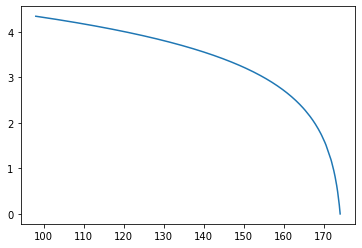

In [26]:
# 거리별 점수 시각화 - 
plt.plot(LL_sam['distance'].sort_values(),np.log(-LL_sam['distance']+LL_sam['distance'].max()+1).sort_values(ascending=False))

In [31]:
LL_sam[LL_sam['distance']==LL_sam['distance'].max()]

,Unnamed: 0,index,name,upjong,address_x,category,평점_건수,평점_합계,평점_평균,평점_표준편차,Latitude,Longitude,상태,weighted_rating,distance,distance_log,OM,OMscore
4171,4171,4171,인추자커피앤민박,기타,"제주특별자치도 제주시 추자면 추자로 20-1, 1층",제주시,14,61.5,4.392857,0.525451,33.96371,126.2968,정좌표,4.420896,62.767949,0.0,4.393863,3.536717


In [32]:
LL_sam

,Unnamed: 0,index,name,upjong,address_x,category,평점_건수,평점_합계,평점_평균,평점_표준편차,Latitude,Longitude,상태,weighted_rating,distance,distance_log,OM,OMscore
0,0,0,설레임,한식,"제주특별자치도 제주시 애월읍 일주서로 5999-1, 2층",애월읍,5042,23596.5,4.679988,0.904803,33.447134,126.305766,정좌표,4.677571,22.675019,4.480798,4.696353,4.638217
1,1,1,해물섬,한식,"제주특별자치도 제주시 애월읍 애월로11길 19, 1층",애월읍,43,196.0,4.558140,0.757575,33.465968,126.320629,정좌표,4.489309,21.474709,4.515516,4.565261,4.494551
2,2,2,엄지흑돼지,한식,"제주특별자치도 제주시 애월읍 일주서로 6701, 1층",애월읍,64,296.5,4.632812,0.878501,33.471880,126.368180,정좌표,4.544393,17.236126,4.630688,4.602996,4.561652
3,3,3,비금향,기타,"제주특별자치도 제주시 애월읍 항몽로 133, 1층",애월읍,3,13.5,4.500000,0.500000,33.472562,126.409329,정좌표,4.433009,13.543152,4.722782,4.465592,4.490963
4,4,4,우미노식탁,기타,"제주특별자치도 제주시 애월읍 금성5길 42-24, 1층",애월읍,127,581.0,4.574803,0.821532,33.447877,126.301242,정좌표,4.534184,23.097392,4.468339,4.601255,4.521015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,7306,7306,지에스25서귀비석거리점,편의점,제주특별자치도 서귀포시 일주동로 8541 (동홍동),서귀포시,10,46.5,4.650000,0.474342,33.254530,126.575600,정좌표,4.466380,20.759988,4.535724,4.452866,4.480249
7307,7307,7307,하은이네손만두김밥,일반조리판매,"제주특별자치도 서귀포시 천제연로 223, 1층 (중문동)",서귀포시,25,118.5,4.740000,0.502494,33.251620,126.428500,정좌표,4.534006,23.793848,4.447511,4.606019,4.516707
7308,7308,7308,씨유서귀라메르점,편의점,"제주특별자치도 서귀포시 중정로5번길 15, 1층 101호 (서귀동)",서귀포시,9,43.0,4.777778,0.363242,33.248670,126.557800,정좌표,4.483042,21.287289,4.520848,4.494753,4.490603
7309,7309,7309,지에스25서귀파인힐점,편의점,"제주특별자치도 서귀포시 홍중로 119-2, 602동 204호 (서홍동, 서강파인힐6차)",서귀포시,7,29.5,4.214286,0.566947,33.263650,126.555200,정좌표,4.402079,19.615200,4.567402,4.343802,4.435144


In [18]:
def conn(d_name):
    import pymysql
    host_name = 'localhost'
    host_port = 3306
    username = 'root'
    password = '0000'
    database_name = d_name
    db = pymysql.connect(
        host=host_name,     # MySQL Server Address
        port=host_port,          # MySQL Server Port
        user=username,      # MySQL username
        passwd=password,    # password for MySQL username
        db=database_name,   # Database name
        charset='utf8'
    )
    return db

In [19]:
db = conn('sample')

In [21]:
sql = 'select * from rest_data3'
LL_sam = pd.read_sql(sql,db)

In [57]:
def make_OMscore(LL_sam,state,quantile=0.6):
    # 리뷰가중평점
    m = LL_sam['star_count'].quantile(quantile)
    C = LL_sam['star_avg'].mean()
    LL_sam['weighted_rating'] = LL_sam.apply((lambda x: (x['star_count']/(x['star_count']+m)*x['star_avg'])+(m/(m+x['star_count'])*C)), axis=1)

    # 내 위치 입력하면 모든 식당과의 거리 산출 - 약 5초
    LL_sam['distance']=[haversine(state, list((LL_sam[['Latitude','Longitude']].iloc[i]))) for i in range(len(LL_sam))]

    # 로그함수를 이용해 거리 점수 산출 - 최대점수 5점으로 조정
    LL_sam['distance_log'] = np.log(-LL_sam['distance']+LL_sam['distance'].max()+1)
    LL_sam['distance_log']=LL_sam['distance_log']/LL_sam['distance_log'].max()*5

    # 어디가맨 지수
    LL_sam['OMscore'] = LL_sam['distance_log']*0.2+LL_sam['weighted_rating']*0.8
    
    # 어디가맨 지수 상위 10개 식당
    top10=LL_sam[['name','address','OMscore','Latitude','Longitude']].sort_values('OMscore',ascending=False)[:10]
    
    # 딕셔너리 생성
    dic = {}
    dic['name']=list(top10['name'])
    dic['address']=list(top10['address'].values)
    dic['OMscore']=list(top10['OMscore'].values)
    dic['Latitude']=list(top10['Latitude'].values)
    dic['Longitude']=list(top10['Longitude'].values)
    
    # 어디가맨 지수 상위 10개 식당 추출
    return dic

In [23]:
state=[33.4,125.54]
make_OMscore(LL_sam,state)

,name,address,weighted_rating,distance,OMscore
607,제주기역,"제주특별자치도 제주시 한림읍 협재1길 19-8, 1층",4.893670,65.261498,4.893173
240,트라몬토제주모슬포본점,제주특별자치도 서귀포시 대정읍 하모항구로 38,4.896892,69.029193,4.882746
132,호커센터,제주특별자치도 제주시 애월읍 애월로11길 25-2,4.904735,72.761365,4.875373
2487,쉬다가게,"제주특별자치도 제주시 애월읍 구엄길 66, 1층",4.918951,78.082798,4.865778
600,오만정성,"제주특별자치도 제주시 한림읍 일주서로 5083, 1층",4.861369,65.925140,4.865094
540,제주나무처럼,"제주특별자치도 제주시 한림읍 홍수암로 3-1, 1층",4.851374,63.711268,4.864483
2841,장어창고,"제주특별자치도 제주시 한경면 두신로 146, 1층",4.831936,60.283198,4.859920
2858,쪼끄뜨레,"제주특별자치도 제주시 한경면 두신로 85, B동 1층",4.829545,59.959326,4.859019
611,동명정류장,"제주특별자치도 제주시 한림읍 동명7길 26, 1층",4.860059,67.397047,4.859003
576,수르르,"제주특별자치도 제주시 한림읍 금능5길 26, 1층",4.813939,63.790032,4.834276


In [50]:
def make_db(state):
    db = conn('sample')
    sql = 'select * from rest_data3'
    LL_sam = pd.read_sql(sql,db)
    file_path = "data/OMscore.json"
    with open(file_path,'w', encoding="UTF-8") as outfile:
        json.dump(make_OMscore(LL_sam,state), outfile, ensure_ascii=False)
    return make_OMscore(LL_sam,state)

In [58]:
make_db(state)

{'name': ['제주기역',
  '트라몬토제주모슬포본점',
  '호커센터',
  '쉬다가게',
  '오만정성',
  '제주나무처럼',
  '장어창고',
  '쪼끄뜨레',
  '동명정류장',
  '수르르'],
 'address': ['제주특별자치도 제주시 한림읍 협재1길 19-8, 1층',
  '제주특별자치도 서귀포시 대정읍 하모항구로 38',
  '제주특별자치도 제주시 애월읍 애월로11길 25-2',
  '제주특별자치도 제주시 애월읍 구엄길 66, 1층',
  '제주특별자치도 제주시 한림읍 일주서로 5083, 1층',
  '제주특별자치도 제주시 한림읍 홍수암로 3-1, 1층',
  '제주특별자치도 제주시 한경면 두신로 146, 1층',
  '제주특별자치도 제주시 한경면 두신로 85, B동 1층',
  '제주특별자치도 제주시 한림읍 동명7길 26, 1층',
  '제주특별자치도 제주시 한림읍 금능5길 26, 1층'],
 'OMscore': [4.8931732727705874,
  4.882745626100863,
  4.875372852659165,
  4.865778010018497,
  4.865094257942376,
  4.864482753982757,
  4.859920219175436,
  4.859018891834663,
  4.859003297118503,
  4.834275555841055],
 'Latitude': [33.3976,
  33.2175,
  33.4669,
  33.4803,
  33.3891,
  33.3844,
  33.3552,
  33.3506,
  33.3971,
  33.3892],
 'Longitude': [126.243,
  126.25,
  126.32,
  126.376,
  126.25,
  126.226,
  126.187,
  126.183,
  126.266,
  126.227]}

In [59]:
pd.read_json('data/OMscore.json')

,name,address,OMscore,Latitude,Longitude
0,제주기역,"제주특별자치도 제주시 한림읍 협재1길 19-8, 1층",4.893173,33.3976,126.243
1,트라몬토제주모슬포본점,제주특별자치도 서귀포시 대정읍 하모항구로 38,4.882746,33.2175,126.250
2,호커센터,제주특별자치도 제주시 애월읍 애월로11길 25-2,4.875373,33.4669,126.320
3,쉬다가게,"제주특별자치도 제주시 애월읍 구엄길 66, 1층",4.865778,33.4803,126.376
4,오만정성,"제주특별자치도 제주시 한림읍 일주서로 5083, 1층",4.865094,33.3891,126.250
5,제주나무처럼,"제주특별자치도 제주시 한림읍 홍수암로 3-1, 1층",4.864483,33.3844,126.226
6,장어창고,"제주특별자치도 제주시 한경면 두신로 146, 1층",4.859920,33.3552,126.187
7,쪼끄뜨레,"제주특별자치도 제주시 한경면 두신로 85, B동 1층",4.859019,33.3506,126.183
8,동명정류장,"제주특별자치도 제주시 한림읍 동명7길 26, 1층",4.859003,33.3971,126.266
9,수르르,"제주특별자치도 제주시 한림읍 금능5길 26, 1층",4.834276,33.3892,126.227
